# Team 2 - Google Play Store

![](https://www.brandnol.com/wp-content/uploads/2019/04/Google-Play-Store-Search.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/lava18/google-play-store-apps)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of null values. How should we handle them?
- Column `Installs` and `Size` have some strange values. Can you identify them?
- Values in `Size` column are currently in different format: `M`, `k`. And how about the value `Varies with device`?
- `Price` column is not in the right data type
- And more...


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
link = '/content/drive/My Drive/Colab Notebooks/Week04/google-play-store.csv'
apps = pd.read_csv(link)
print('The number of apps is', apps.size)
apps.head()

The number of apps is 140933


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
apps['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

# Preprocessing the data


In [4]:
# Show columns with NaN
apps[apps.isnull().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [5]:
# Drop all rows with a NaN value because the number of rows dropped is negligible (only about 1%)
apps.dropna(inplace=True)
apps.size

121680

In [6]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [7]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [0]:
def preprocess_install(data):
    data = data.replace(',', '')
    if data[-1] == '+':
        return int(data[:-1])
    return int(data)
apps['Installs'] = apps['Installs'].apply(preprocess_install)

In [9]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
# Change
apps['Rating'].astype('float32')

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9360, dtype: float32

In [11]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [12]:
# Distinct value for type
apps['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [0]:
def preprocess_size(data):
    factor_char_to_num = {
        'k': 1024,
        'M': int(1024**2),
        'G': int(1024**3)
    }
    factor_char = data[-1:]
    if data == 'Varies with device':
        ans = -1
    elif factor_char.isalpha():
        factor_num = factor_char_to_num[factor_char]
        value = float(data[:-1])
        ans = value * factor_num
    else:
        factor_num = 1
        value = int(data[:-1])
        ans = value
    return int(ans)    

In [14]:
apps['Size'] = apps['Size'].apply(preprocess_size)
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [15]:
apps['Price'] = apps['Price'].apply(lambda x: x if x[0] != '$' else x[1:])
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [0]:
apps['Price'] = apps['Price'].astype('float64')

In [17]:
apps['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [18]:
genres = dict()

for index, row in apps.iterrows():
    genre_list_str = row[9]
    genre_list = list(genre_list_str.split(';'))
    for genre in genre_list:
        if genre not in genres:
            genres[genre] = 1
        else:
            genres[genre] += 1

genres_names = []
genres_counts = []
for k, v in genres.items():
    genres_names.append(k)
    genres_counts.append(v)
genres_df = pd.DataFrame(list(zip(genres_names, genres_counts)), columns=['Genre', 'Frequency'])
genres_df

,Genre,Frequency
0,Art & Design,64
1,Pretend Play,89
2,Creativity,36
3,Auto & Vehicles,73
4,Beauty,42
5,Books & Reference,180
6,Business,303
7,Comics,58
8,Communication,329
9,Dating,195


In [0]:
apps['Reviews'] = apps['Reviews'].astype('int64')

In [0]:
# remove duplicated version of apps (they are basically the same app with just small derivation in the number of reviews)
apps.drop_duplicates(['App', 'Current Ver'], inplace=True)

In [34]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [0]:
apps.to_csv('preprecossesed_apps.csv', index=False)
genres_df.to_csv('genres.csv', index=False)

# Analyze the data

In [38]:
# Top 10 most reviewed apps
apps.sort_values('Reviews', ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,-1,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,-1,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,-1,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,-1,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1670,Clash of Clans,GAME,4.6,44891723,102760448,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,-1,500000000,Free,0.0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264,79691776,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,-1,1000000000,Free,0.0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,-1,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
1660,Clash Royale,GAME,4.6,23133508,101711872,100000000,Free,0.0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up


In [41]:
apps['Reviews'].describe()

count    8.200000e+03
mean     2.562877e+05
std      1.986809e+06
min      1.000000e+00
25%      1.267500e+02
50%      3.027000e+03
75%      4.406425e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [46]:
# Among apps with more than 3000 revies, what are the 10 highest rated apps?
apps_rating = apps.sort_values('Reviews', ascending=False)
apps_rating[apps_rating['Reviews'] > 3000].sort_values('Rating').tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10016,Eddsworld Amino,SOCIAL,4.9,3071,66060288,10000,Free,0.00,Teen,Social,"July 13, 2018",1.8.19106,4.0.3 and up
1307,StrongLifts 5x5 Workout Gym Log & Personal Tra...,HEALTH_AND_FITNESS,4.9,66791,10485760,1000000,Free,0.00,Everyone,Health & Fitness,"July 30, 2018",Varies with device,Varies with device
64,DMV Permit Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,6090,28311552,100000,Free,0.00,Everyone,Auto & Vehicles,"July 3, 2018",1.7,4.2 and up
6052,Be My Eyes - Helping the blind,LIFESTYLE,4.9,8418,22020096,500000,Free,0.00,Everyone,Lifestyle,"July 11, 2018",1.2.9,4.4 and up
1833,The Room: Old Sins,GAME,4.9,21119,50331648,100000,Paid,4.99,Everyone,Puzzle,"April 18, 2018",1.0.1,4.4 and up
99,"ipsy: Makeup, Beauty, and Tips",BEAUTY,4.9,49790,14680064,1000000,Free,0.00,Everyone,Beauty,"November 9, 2017",2.3.0,4.1 and up
61,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,7774,17825792,100000,Free,0.00,Everyone,Auto & Vehicles,"July 3, 2018",1.7,4.2 and up
2344,Period Tracker,MEDICAL,4.9,100082,3879731,1000000,Free,0.00,Everyone,Medical,"July 9, 2018",1.2.2,4.1 and up
1260,Six Pack in 30 Days - Abs Workout,HEALTH_AND_FITNESS,4.9,272337,13631488,10000000,Free,0.00,Everyone,Health & Fitness,"June 21, 2018",1.0.2,4.2 and up
55,Tickets SDA 2018 and Exam from the State Traff...,AUTO_AND_VEHICLES,4.9,10479,34603008,100000,Free,0.00,Everyone,Auto & Vehicles,"July 18, 2018",1.7.1,4.0 and up


In [47]:
apps_rating = apps.sort_values('Reviews', ascending=False)
apps_rating[apps_rating['Reviews'] > 4e4].sort_values('Rating').tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4799,PewDiePie's Tuber Simulator,FAMILY,4.8,1499466,100663296,10000000,Free,0.0,Teen,Casual,"July 24, 2018",1.25.0,4.1 and up
2344,Period Tracker,MEDICAL,4.9,100082,3879731,1000000,Free,0.0,Everyone,Medical,"July 9, 2018",1.2.2,4.1 and up
1307,StrongLifts 5x5 Workout Gym Log & Personal Tra...,HEALTH_AND_FITNESS,4.9,66791,10485760,1000000,Free,0.0,Everyone,Health & Fitness,"July 30, 2018",Varies with device,Varies with device
79,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,4.9,197136,39845888,1000000,Free,0.0,Everyone,Auto & Vehicles,"July 15, 2018",8.31,4.1 and up
3933,Hungry Hearts Diner: A Tale of Star-Crossed Souls,FAMILY,4.9,46253,58720256,500000,Free,0.0,Everyone 10+,Simulation,"February 7, 2018",1.0.1,4.0 and up
7000,PixPanda - Color by Number Pixel Art Coloring ...,FAMILY,4.9,55723,14680064,1000000,Free,0.0,Everyone,Entertainment,"June 4, 2018",3.3,4.0.3 and up
99,"ipsy: Makeup, Beauty, and Tips",BEAUTY,4.9,49790,14680064,1000000,Free,0.0,Everyone,Beauty,"November 9, 2017",2.3.0,4.1 and up
712,"Learn Japanese, Korean, Chinese Offline & Free",EDUCATION,4.9,133136,27262976,1000000,Free,0.0,Everyone,Education;Education,"July 20, 2018",2.16.11.10,4.2 and up
9625,JW Library,BOOKS_AND_REFERENCE,4.9,922752,-1,10000000,Free,0.0,Everyone,Books & Reference,"June 15, 2018",Varies with device,Varies with device
1260,Six Pack in 30 Days - Abs Workout,HEALTH_AND_FITNESS,4.9,272337,13631488,10000000,Free,0.0,Everyone,Health & Fitness,"June 21, 2018",1.0.2,4.2 and up


## What is the most popular social network application by the number of reviews?

In [55]:
apps_rating = apps.sort_values('Reviews', ascending=False)
apps_rating[apps_rating['Category'] == 'SOCIAL'].head(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,-1,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,-1,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2550,Snapchat,SOCIAL,4.0,17014787,-1,500000000,Free,0.0,Teen,Social,"July 30, 2018",Varies with device,Varies with device
2546,Facebook Lite,SOCIAL,4.3,8606259,-1,500000000,Free,0.0,Teen,Social,"August 1, 2018",Varies with device,Varies with device
6373,VK,SOCIAL,3.8,5793284,-1,100000000,Free,0.0,Mature 17+,Social,"August 3, 2018",Varies with device,Varies with device
3945,Tik Tok - including musical.ly,SOCIAL,4.4,5637451,61865984,100000000,Free,0.0,Teen,Social,"August 3, 2018",8.0.0,4.1 and up
2554,Google+,SOCIAL,4.2,4831125,-1,1000000000,Free,0.0,Teen,Social,"July 26, 2018",Varies with device,Varies with device
2552,Pinterest,SOCIAL,4.6,4305441,-1,100000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
2592,Tango - Live Video Broadcast,SOCIAL,4.3,3806669,-1,100000000,Free,0.0,Mature 17+,Social,"August 1, 2018",Varies with device,Varies with device
2588,Badoo - Free Chat & Dating App,SOCIAL,4.3,3781770,-1,100000000,Free,0.0,Mature 17+,Social,"August 2, 2018",Varies with device,Varies with device


## Which categories have the most applications in store?

In [65]:
apps['Category'].value_counts()[:10]

FAMILY             1612
GAME                913
TOOLS               719
FINANCE             302
LIFESTYLE           301
PRODUCTIVITY        301
PERSONALIZATION     296
MEDICAL             291
BUSINESS            263
PHOTOGRAPHY         263
Name: Category, dtype: int64

## Which genres have the most app in the store?

In [64]:
genres_df.sort_values('Frequency', ascending=False).head(10).reset_index(drop=True)

,Genre,Frequency
0,Tools,733
1,Education,670
2,Entertainment,577
3,Action,375
4,Productivity,351
5,Medical,350
6,Sports,337
7,Communication,329
8,Finance,323
9,Photography,317


## Is rating in Google Store inflated?

In [73]:
apps['Rating'].value_counts().sort_values(ascending=False).head(10)

4.3    898
4.4    897
4.5    849
4.2    809
4.6    684
4.1    622
4.0    512
4.7    442
3.9    359
3.8    286
Name: Rating, dtype: int64

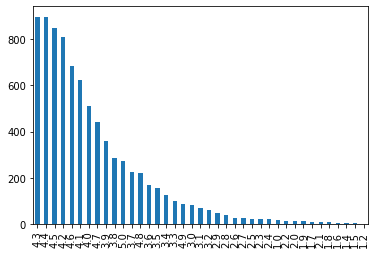

In [82]:
import matplotlib.pyplot as plt

_ = pd.value_counts(apps['Rating']).plot(kind='bar')

In [67]:
apps['Content Rating'].value_counts()

Everyone           6622
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

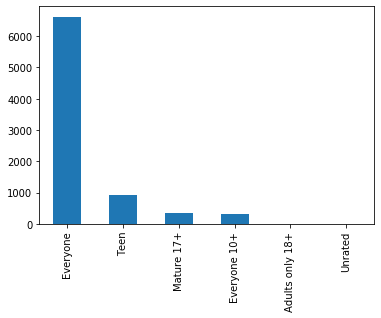

In [83]:
pd.value_counts(apps['Content Rating']).plot(kind='bar')